In [0]:
import tensorflow as tf
import keras
print(keras.__version__)
print(tf.__version__)

2.2.4
1.13.1


Using TensorFlow backend.


In [0]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [0]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

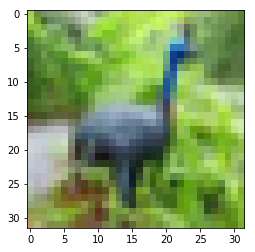

In [0]:
plt.imshow(x_train[6])

In [0]:
'标签字典'
label_dict = {0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer',
              5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}

def plot_images_lables_prediction(images_list, labels_list, prediction_list, # 图像，标签， 预测值
                                  index=0,      # 开始指针
                                  num=10, num_max=25):    # 设置显示图的数量
    
    fig = plt.gcf()  #  获取当前图表 get current figure
    fig.set_size_inches(20, 20)  #  1 inches = 2.54 cm
    if num > num_max:
        num = num_max
    for i in range(0, num):
        ax = plt.subplot(5, 5, i+1)
        ax.imshow(images_list[index], cmap='binary')
        title = str(index) + ': ' + label_dict[int(labels_list[index])]
        if len(prediction_list) > 0:
            title += '= >' + str(prediction_list[index])
        ax.set_title(title, fontsize=30)
        ax.set_xticks([])   # 不显示x坐标轴
        ax.set_yticks([])   # 不显示y坐标轴
        index += 1
    plt.show()

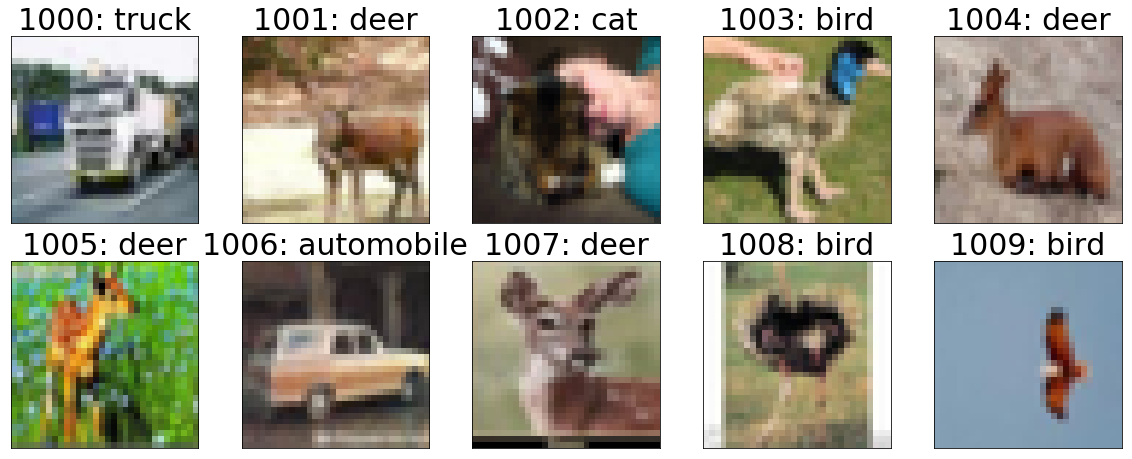

In [0]:
plot_images_lables_prediction(x_train, y_train, [], index=1000, num=10, num_max=25)

In [0]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train, num_classes=10)
y_test = np_utils.to_categorical(y_test, num_classes=10)

## 基础卷积网络

In [0]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dropout(0.3))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_251 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_252 (Conv2D)          (None, 32, 32, 32)        9248      
_________________________________________________________________
conv2d_253 (Conv2D)          (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_61 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_254 (Conv2D)          (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_255 (Conv2D)          (None, 16, 16, 64)        36928     
__________

In [0]:
from keras.optimizers import Adam, Adadelta, RMSprop, SGD

optimizer = Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=1e-6)
# optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=1e-5, amsgrad=False)
# optimizer = RMSprop(lr=0.01, rho=0.9, epsilon=None, decay=1e-3)
# optimizer = SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)

model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

model_checkpoint = ModelCheckpoint('cifar10_model_1.h5', monitor='val_acc', verbose=1, 
                                   mode='auto', period=1, save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.2, patience=5, verbose=1, min_lr=1e-7)
early_stopping = EarlyStopping(monitor='val_acc', min_delta=0, patience=10, verbose=1, mode='auto')


callbacks = [model_checkpoint, reduce_lr, early_stopping]
# callbacks = [model_checkpoint, reduce_lr]

In [0]:
model.fit(x_train, y_train, batch_size=128,
          epochs=100, validation_split=0.2,
          callbacks=callbacks)

Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 22s 545us/step - loss: 1.6196 - acc: 0.3995 - val_loss: 2.5863 - val_acc: 0.3200

Epoch 00001: val_acc improved from -inf to 0.32000, saving model to cifar10_model_1.h5
Epoch 2/100
40000/40000 [==============================] - 10s 254us/step - loss: 1.1069 - acc: 0.6061 - val_loss: 1.7196 - val_acc: 0.4997

Epoch 00002: val_acc improved from 0.32000 to 0.49970, saving model to cifar10_model_1.h5
Epoch 3/100
40000/40000 [==============================] - 10s 254us/step - loss: 0.8723 - acc: 0.6953 - val_loss: 1.5601 - val_acc: 0.5268

Epoch 00003: val_acc improved from 0.49970 to 0.52680, saving model to cifar10_model_1.h5
Epoch 4/100
40000/40000 [==============================] - 10s 254us/step - loss: 0.7229 - acc: 0.7475 - val_loss: 1.2558 - val_acc: 0.6075

Epoch 00004: val_acc improved from 0.52680 to 0.60750, saving model to cifar10_model_1.h5
Epoch 5/100
40000/40000 [====

In [0]:
from keras.models import load_model

model = load_model('cifar10_model_1.h5')
model.evaluate(x_test, y_test, batch_size=128)

10000/10000 [==============================] - 6s 561us/step


[0.8650078344345092, 0.8372]

## 正则化

In [0]:
from keras import layers
from keras import models
from keras import regularizers

def model_regularizers(regularizer):
    model = models.Sequential()

    model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3), kernel_regularizer=regularizer))
    model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', kernel_regularizer=regularizer))
    model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', kernel_regularizer=regularizer))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu', kernel_regularizer=regularizer))
    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu', kernel_regularizer=regularizer))
    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu', kernel_regularizer=regularizer))
    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu', kernel_regularizer=regularizer))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu', kernel_regularizer=regularizer))
    model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu', kernel_regularizer=regularizer))
    model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu', kernel_regularizer=regularizer))
    model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu', kernel_regularizer=regularizer))
    model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu', kernel_regularizer=regularizer))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(10, activation='softmax'))
    
    optimizer = Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=1e-6)
    model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])
    
    model.summary()
    
    return model

### regularizers.l2(0.1)

In [0]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.optimizers import Adam, Adadelta, RMSprop, SGD
from keras import regularizers

model_checkpoint = ModelCheckpoint('cifar10_model_2.h5', monitor='val_acc', verbose=1, 
                                   mode='auto', period=1, save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.2, patience=5, verbose=1, min_lr=1e-7)
early_stopping = EarlyStopping(monitor='val_acc', min_delta=0, patience=10, verbose=1, mode='auto')

callbacks = [model_checkpoint, reduce_lr, early_stopping]

regularizer = regularizers.l2(0.1)    # <<---------------------------------
model = model_regularizers(regularizer)

model.fit(x_train, y_train, batch_size=128,
          epochs=100, validation_split=0.2,
          callbacks=callbacks)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_155 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_156 (Conv2D)          (None, 32, 32, 32)        9248      
_________________________________________________________________
conv2d_157 (Conv2D)          (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_37 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_158 (Conv2D)          (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_159 (Conv2D)          (None, 16, 16, 64)        36928     
__________

In [0]:
from keras.models import load_model

model = load_model('cifar10_model_2.h5')
model.evaluate(x_test, y_test, batch_size=128)

10000/10000 [==============================] - 4s 359us/step


[1.8557699523925781, 0.3108]

### regularizers.l2(0.01)

In [0]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.optimizers import Adam, Adadelta, RMSprop, SGD
from keras import regularizers

model_checkpoint = ModelCheckpoint('cifar10_model_3.h5', monitor='val_acc', verbose=1, 
                                   mode='auto', period=1, save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.2, patience=5, verbose=1, min_lr=1e-7)
early_stopping = EarlyStopping(monitor='val_acc', min_delta=0, patience=10, verbose=1, mode='auto')

callbacks = [model_checkpoint, reduce_lr, early_stopping]

regularizer = regularizers.l2(0.01)    # <<---------------------------------
model = model_regularizers(regularizer)

model.fit(x_train, y_train, batch_size=128,
          epochs=100, validation_split=0.2,
          callbacks=callbacks)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_167 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_168 (Conv2D)          (None, 32, 32, 32)        9248      
_________________________________________________________________
conv2d_169 (Conv2D)          (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_40 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_170 (Conv2D)          (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_171 (Conv2D)          (None, 16, 16, 64)        36928     
__________

In [0]:
from keras.models import load_model

model = load_model('cifar10_model_3.h5')
model.evaluate(x_test, y_test, batch_size=128)

10000/10000 [==============================] - 4s 377us/step


[0.8144150612831116, 0.8047]

### regularizers.l2(0.001)

In [0]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.optimizers import Adam, Adadelta, RMSprop, SGD
from keras import regularizers

model_checkpoint = ModelCheckpoint('cifar10_model_4.h5', monitor='val_acc', verbose=1, 
                                   mode='auto', period=1, save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.2, patience=5, verbose=1, min_lr=1e-7)
early_stopping = EarlyStopping(monitor='val_acc', min_delta=0, patience=10, verbose=1, mode='auto')

callbacks = [model_checkpoint, reduce_lr, early_stopping]

regularizer = regularizers.l2(0.001)    # <<---------------------------------
model = model_regularizers(regularizer)

model.fit(x_train, y_train, batch_size=128,
          epochs=100, validation_split=0.2,
          callbacks=callbacks)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_179 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_180 (Conv2D)          (None, 32, 32, 32)        9248      
_________________________________________________________________
conv2d_181 (Conv2D)          (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_43 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_182 (Conv2D)          (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_183 (Conv2D)          (None, 16, 16, 64)        36928     
__________

In [0]:
from keras.models import load_model

model = load_model('cifar10_model_4.h5')
model.evaluate(x_test, y_test, batch_size=128)

10000/10000 [==============================] - 4s 396us/step


[0.8791415970802308, 0.8415]

### regularizers.l2(0.0001)

In [0]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.optimizers import Adam, Adadelta, RMSprop, SGD
from keras import regularizers

model_checkpoint = ModelCheckpoint('cifar10_model_5.h5', monitor='val_acc', verbose=1, 
                                   mode='auto', period=1, save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.2, patience=5, verbose=1, min_lr=1e-7)
early_stopping = EarlyStopping(monitor='val_acc', min_delta=0, patience=10, verbose=1, mode='auto')

callbacks = [model_checkpoint, reduce_lr, early_stopping]

regularizer = regularizers.l2(0.0001)    # <<---------------------------------
model = model_regularizers(regularizer)

model.fit(x_train, y_train, batch_size=128,
          epochs=100, validation_split=0.2,
          callbacks=callbacks)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_191 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_192 (Conv2D)          (None, 32, 32, 32)        9248      
_________________________________________________________________
conv2d_193 (Conv2D)          (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_46 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_194 (Conv2D)          (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_195 (Conv2D)          (None, 16, 16, 64)        36928     
__________

In [0]:
from keras.models import load_model

model = load_model('cifar10_model_5.h5')
model.evaluate(x_test, y_test, batch_size=128)

10000/10000 [==============================] - 4s 414us/step


[0.9760564441680908, 0.8346]

### regularizers.l1(0.0001)

In [0]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.optimizers import Adam, Adadelta, RMSprop, SGD
from keras import regularizers

model_checkpoint = ModelCheckpoint('cifar10_model_6.h5', monitor='val_acc', verbose=1, 
                                   mode='auto', period=1, save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.2, patience=5, verbose=1, min_lr=1e-7)
early_stopping = EarlyStopping(monitor='val_acc', min_delta=0, patience=10, verbose=1, mode='auto')

callbacks = [model_checkpoint, reduce_lr, early_stopping]

regularizer = regularizers.l1(0.0001)    # <<---------------------------------
model = model_regularizers(regularizer)

model.fit(x_train, y_train, batch_size=128,
          epochs=100, validation_split=0.2,
          callbacks=callbacks)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_203 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_204 (Conv2D)          (None, 32, 32, 32)        9248      
_________________________________________________________________
conv2d_205 (Conv2D)          (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_49 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_206 (Conv2D)          (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_207 (Conv2D)          (None, 16, 16, 64)        36928     
__________

In [0]:
from keras.models import load_model

model = load_model('cifar10_model_6.h5')
model.evaluate(x_test, y_test, batch_size=128)

10000/10000 [==============================] - 4s 431us/step


[1.2036891553878784, 0.8184]

### regularizers.l1(0.001)

In [0]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.optimizers import Adam, Adadelta, RMSprop, SGD
from keras import regularizers

model_checkpoint = ModelCheckpoint('cifar10_model_7.h5', monitor='val_acc', verbose=1, 
                                   mode='auto', period=1, save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.2, patience=5, verbose=1, min_lr=1e-7)
early_stopping = EarlyStopping(monitor='val_acc', min_delta=0, patience=10, verbose=1, mode='auto')

callbacks = [model_checkpoint, reduce_lr, early_stopping]

regularizer = regularizers.l1(0.001)    # <<---------------------------------
model = model_regularizers(regularizer)

model.fit(x_train, y_train, batch_size=128,
          epochs=100, validation_split=0.2,
          callbacks=callbacks)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_215 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_216 (Conv2D)          (None, 32, 32, 32)        9248      
_________________________________________________________________
conv2d_217 (Conv2D)          (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_52 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_218 (Conv2D)          (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_219 (Conv2D)          (None, 16, 16, 64)        36928     
__________

In [0]:
from keras.models import load_model

model = load_model('cifar10_model_7.h5')
model.evaluate(x_test, y_test, batch_size=128)

10000/10000 [==============================] - 5s 451us/step


[1.0561156918525696, 0.708]

### regularizers.l1_l2(l1=0.0001, l2=0.001)

In [0]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.optimizers import Adam, Adadelta, RMSprop, SGD
from keras import regularizers

model_checkpoint = ModelCheckpoint('cifar10_model_8.h5', monitor='val_acc', verbose=1, 
                                   mode='auto', period=1, save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.2, patience=5, verbose=1, min_lr=1e-7)
early_stopping = EarlyStopping(monitor='val_acc', min_delta=0, patience=10, verbose=1, mode='auto')

callbacks = [model_checkpoint, reduce_lr, early_stopping]

regularizer = regularizers.l1_l2(l1=0.0001, l2=0.001)    # <<---------------------------------
model = model_regularizers(regularizer)

model.fit(x_train, y_train, batch_size=128,
          epochs=100, validation_split=0.2,
          callbacks=callbacks)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_239 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_240 (Conv2D)          (None, 32, 32, 32)        9248      
_________________________________________________________________
conv2d_241 (Conv2D)          (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_58 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_242 (Conv2D)          (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_243 (Conv2D)          (None, 16, 16, 64)        36928     
__________

In [0]:
from keras.models import load_model

model = load_model('cifar10_model_8.h5')
model.evaluate(x_test, y_test, batch_size=128)

10000/10000 [==============================] - 5s 523us/step


[0.9611338333129883, 0.8319]

## 数据增强

### 基础卷积网络

In [0]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

'在卷积神经网络上添加分类器'
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dropout(0.3))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_263 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_264 (Conv2D)          (None, 32, 32, 32)        9248      
_________________________________________________________________
conv2d_265 (Conv2D)          (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_64 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_55 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_266 (Conv2D)          (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_267 (Conv2D)          (None, 16, 16, 64)        36928     
__________

In [0]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        featurewise_center=False,  # 在数据集上将输入平均值设置为0
        samplewise_center=False,  # 将每个样本均值设置为0
        featurewise_std_normalization=False,  # 将输入除以数据集的std
        samplewise_std_normalization=False,  # 将每个输入除以其std
        zca_whitening=False,  # 应用ZCA白化
        rotation_range=20,  # 在一个范围下随机旋转图像(degrees, 0 to 180)
        width_shift_range=0.2,  # 水平随机移位图像（总宽度的分数）
        height_shift_range=0.2,  # 随机地垂直移动图像（总高度的分数）
        horizontal_flip=True,  # 随机翻转图像
        vertical_flip=False)  # 随机翻转图像

    # 计算特征方向归一化所需的数量
    # (std, mean, and principal components if ZCA whitening is applied)
datagen.fit(x_train)

In [0]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.optimizers import Adam, Adadelta, RMSprop, SGD

model_checkpoint = ModelCheckpoint('cifar10_model_9.h5', monitor='val_acc', verbose=1, 
                                   mode='auto', period=1, save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.2, patience=5, verbose=1, min_lr=1e-7)
early_stopping = EarlyStopping(monitor='val_acc', min_delta=0, patience=10, verbose=1, mode='auto')

callbacks = [model_checkpoint, reduce_lr, early_stopping]

optimizer = Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=1e-6)
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

model.fit_generator(datagen.flow(x_train, y_train,
                        batch_size=128),
                        samples_per_epoch=x_train.shape[0],
                        nb_epoch=100,
                        validation_data=(x_test, y_test),
                   callbacks=callbacks)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., steps_per_epoch=390, epochs=100)`


Epoch 1/100
390/390 [==============================] - 37s 96ms/step - loss: 1.7300 - acc: 0.3589 - val_loss: 1.9453 - val_acc: 0.4361

Epoch 00001: val_acc improved from -inf to 0.43610, saving model to cifar10_model_9.h5
Epoch 2/100
390/390 [==============================] - 24s 62ms/step - loss: 1.3056 - acc: 0.5318 - val_loss: 1.8989 - val_acc: 0.4360

Epoch 00002: val_acc did not improve from 0.43610
Epoch 3/100
390/390 [==============================] - 24s 62ms/step - loss: 1.0984 - acc: 0.6122 - val_loss: 1.4781 - val_acc: 0.5698

Epoch 00003: val_acc improved from 0.43610 to 0.56980, saving model to cifar10_model_9.h5
Epoch 4/100
390/390 [==============================] - 24s 62ms/step - loss: 0.9792 - acc: 0.6581 - val_loss: 1.3827 - val_acc: 0.5910

Epoch 00004: val_acc improved from 0.56980 to 0.59100, saving model to cifar10_model_9.h5
Epoch 5/100
390/390 [==============================] - 24s 62ms/step - loss: 0.8898 - acc: 0.6911 - val_loss: 0.9406 - val_acc: 0.6886

Epo

In [0]:
from keras.models import load_model

model = load_model('cifar10_model_9.h5')
model.evaluate(x_test, y_test, batch_size=128)

10000/10000 [==============================] - 6s 579us/step


[0.3994561789035797, 0.8772]

### MNIST数据集的一个高精度网络

In [0]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPool2D, Dropout, Dense, GlobalAveragePooling2D, BatchNormalization, concatenate

inputs = Input(shape=(32, 32, 3))
temp = inputs
x = Conv2D(16, (3, 3), padding='same', activation='relu')(inputs)
x = Conv2D(16, (3, 3), padding='same', activation='relu')(x)
x = concatenate([x, temp])
x = BatchNormalization()(x)
x = layers.MaxPooling2D((2, 2))(x)

temp = x
x = Conv2D(32, (3, 3), padding='same', activation='relu')(x)
x = Conv2D(32, (3, 3), padding='same', activation='relu')(x)
x = Conv2D(32, (3, 3), padding='same', activation='relu')(x)
x = concatenate([x, temp])
x = BatchNormalization()(x)
x = layers.MaxPooling2D((2, 2))(x)

temp = x
x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
x = concatenate([x, temp])
x = BatchNormalization()(x)
x = layers.MaxPooling2D((2, 2))(x)

temp = x
x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
x = concatenate([x, temp])
x = BatchNormalization()(x)

x = GlobalAveragePooling2D()(x)

x = Dropout(0.5)(x)
x = layers.Dense(10, activation='softmax')(x)

model = Model(inputs=inputs, outputs=x)

model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_275 (Conv2D)             (None, 32, 32, 16)   448         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_276 (Conv2D)             (None, 32, 32, 16)   2320        conv2d_275[0][0]                 
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, 32, 32, 19)   0           conv2d_276[0][0]                 
                                                                 input_1[0][0]                    
__________

In [0]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        featurewise_center=False,  # 在数据集上将输入平均值设置为0
        samplewise_center=False,  # 将每个样本均值设置为0
        featurewise_std_normalization=False,  # 将输入除以数据集的std
        samplewise_std_normalization=False,  # 将每个输入除以其std
        zca_whitening=False,  # 应用ZCA白化
        rotation_range=20,  # 在一个范围下随机旋转图像(degrees, 0 to 180)
        width_shift_range=0.2,  # 水平随机移位图像（总宽度的分数）
        height_shift_range=0.2,  # 随机地垂直移动图像（总高度的分数）
        horizontal_flip=True,  # 随机翻转图像
        vertical_flip=False)  # 随机翻转图像

    # 计算特征方向归一化所需的数量
    # (std, mean, and principal components if ZCA whitening is applied)
datagen.fit(x_train)

In [0]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.optimizers import Adam, Adadelta, RMSprop, SGD

model_checkpoint = ModelCheckpoint('cifar10_model_10.h5', monitor='val_acc', verbose=1, 
                                   mode='auto', period=1, save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.2, patience=5, verbose=1, min_lr=1e-7)
early_stopping = EarlyStopping(monitor='val_acc', min_delta=0, patience=10, verbose=1, mode='auto')

callbacks = [model_checkpoint, reduce_lr, early_stopping]

optimizer = Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=1e-6)
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

model.fit_generator(datagen.flow(x_train, y_train,
                        batch_size=128),
                        samples_per_epoch=x_train.shape[0],
                        nb_epoch=100,
                        validation_data=(x_test, y_test),
                   callbacks=callbacks)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., steps_per_epoch=390, epochs=100)`


Epoch 1/100
390/390 [==============================] - 37s 96ms/step - loss: 1.5966 - acc: 0.4171 - val_loss: 2.3150 - val_acc: 0.3981

Epoch 00001: val_acc improved from -inf to 0.39810, saving model to cifar10_model_10.h5
Epoch 2/100
390/390 [==============================] - 23s 59ms/step - loss: 1.2478 - acc: 0.5533 - val_loss: 1.7072 - val_acc: 0.5058

Epoch 00002: val_acc improved from 0.39810 to 0.50580, saving model to cifar10_model_10.h5
Epoch 3/100
390/390 [==============================] - 23s 60ms/step - loss: 1.0849 - acc: 0.6170 - val_loss: 1.1029 - val_acc: 0.6455

Epoch 00003: val_acc improved from 0.50580 to 0.64550, saving model to cifar10_model_10.h5
Epoch 4/100
390/390 [==============================] - 23s 60ms/step - loss: 0.9825 - acc: 0.6575 - val_loss: 1.1645 - val_acc: 0.6182

Epoch 00004: val_acc did not improve from 0.64550
Epoch 5/100
390/390 [==============================] - 23s 59ms/step - loss: 0.8999 - acc: 0.6881 - val_loss: 0.9363 - val_acc: 0.6795



In [0]:
from keras.models import load_model

model = load_model('cifar10_model_10.h5')
model.evaluate(x_test, y_test, batch_size=128)

10000/10000 [==============================] - 6s 604us/step


[0.41626314039230344, 0.8766]

### MNIST数据集的最后一个卷积网络

In [0]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPool2D, Dropout, Dense, GlobalAveragePooling2D, BatchNormalization, concatenate

inputs = Input(shape=(32, 32, 3))

x = Conv2D(32, (3, 3), activation='relu')(inputs)
x = Conv2D(32, (1, 1), activation='relu')(x)

x1 = Conv2D(32, (1, 3), activation='relu')(inputs)
x1 = Conv2D(32, (3, 1), activation='relu')(x1)

x2 = Conv2D(32, (1, 1), activation='relu')(inputs)
x2 = Conv2D(32, (3, 3), activation='relu')(x2)

x = concatenate([x, x1, x2])
x = BatchNormalization()(x)
x = layers.MaxPooling2D((2, 2))(x)


temp = x
x = Conv2D(64, (3, 3), activation='relu')(temp)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = Conv2D(64, (1, 1), activation='relu')(x)

x1 = Conv2D(64, (1, 3), activation='relu')(temp)
x1 = Conv2D(64, (3, 1), activation='relu')(x1)
x1 = Conv2D(64, (3, 3), activation='relu')(x1)

x2 = Conv2D(64, (1, 1), activation='relu')(temp)
x2 = Conv2D(64, (3, 3), activation='relu')(x2)
x2 = Conv2D(64, (3, 3), activation='relu')(x2)


x3 = Conv2D(64, (1, 1), activation='relu')(temp)
x3 = Conv2D(64, (5, 5), activation='relu')(x3)

x4 = Conv2D(64, (5, 5), activation='relu')(temp)
x4 = Conv2D(64, (1, 1), activation='relu')(x4)

x = concatenate([x, x1, x2, x3, x4])
x = BatchNormalization()(x)
x = layers.MaxPooling2D((2, 2))(x)


temp = x
x = Conv2D(128, (3, 3), padding='same', activation='relu')(temp)
x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)

x1 = Conv2D(128, (2, 2), padding='same', activation='relu')(temp)
x1 = Conv2D(128, (2, 2), padding='same', activation='relu')(x1)
x1 = Conv2D(128, (2, 2), padding='same', activation='relu')(x1)
x1 = Conv2D(128, (2, 2), padding='same', activation='relu')(x1)
x1 = Conv2D(128, (2, 2), padding='same', activation='relu')(x1)


x2 = Conv2D(128, (3, 1), padding='same', activation='relu')(temp)
x2 = Conv2D(128, (1, 3), padding='same', activation='relu')(x2)
x2 = Conv2D(128, (3, 1), padding='same', activation='relu')(x2)
x2 = Conv2D(128, (1, 3), padding='same', activation='relu')(x2)
x2 = Conv2D(128, (1, 1), padding='same', activation='relu')(x2)

x = concatenate([x, x1, x2, temp])
x = BatchNormalization()(x)

x = GlobalAveragePooling2D()(x)

x = Dropout(0.5)(x)
x = layers.Dense(10, activation='softmax')(x)

model = Model(inputs=inputs, outputs=x)

model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_323 (Conv2D)             (None, 30, 30, 32)   896         input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_325 (Conv2D)             (None, 32, 30, 32)   320         input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_327 (Conv2D)             (None, 32, 32, 32)   128         input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_324

In [0]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        featurewise_center=False,  # 在数据集上将输入平均值设置为0
        samplewise_center=False,  # 将每个样本均值设置为0
        featurewise_std_normalization=False,  # 将输入除以数据集的std
        samplewise_std_normalization=False,  # 将每个输入除以其std
        zca_whitening=False,  # 应用ZCA白化
        rotation_range=20,  # 在一个范围下随机旋转图像(degrees, 0 to 180)
        width_shift_range=0.2,  # 水平随机移位图像（总宽度的分数）
        height_shift_range=0.2,  # 随机地垂直移动图像（总高度的分数）
        horizontal_flip=True,  # 随机翻转图像
        vertical_flip=False)  # 随机翻转图像

    # 计算特征方向归一化所需的数量
    # (std, mean, and principal components if ZCA whitening is applied)
datagen.fit(x_train)

In [0]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.optimizers import Adam, Adadelta, RMSprop, SGD

model_checkpoint = ModelCheckpoint('cifar10_model_11.h5', monitor='val_acc', verbose=1, 
                                   mode='auto', period=1, save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.2, patience=5, verbose=1, min_lr=1e-7)
early_stopping = EarlyStopping(monitor='val_acc', min_delta=0, patience=10, verbose=1, mode='auto')

callbacks = [model_checkpoint, reduce_lr, early_stopping]

optimizer = Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=1e-6)
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

model.fit_generator(datagen.flow(x_train, y_train,
                        batch_size=128),
                        samples_per_epoch=x_train.shape[0],
                        nb_epoch=100,
                        validation_data=(x_test, y_test),
                   callbacks=callbacks)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., steps_per_epoch=390, epochs=100)`


Epoch 1/100
390/390 [==============================] - 47s 121ms/step - loss: 1.5806 - acc: 0.4303 - val_loss: 1.5578 - val_acc: 0.4476

Epoch 00001: val_acc improved from -inf to 0.44760, saving model to cifar10_model_11.h5
Epoch 2/100
390/390 [==============================] - 29s 75ms/step - loss: 1.2410 - acc: 0.5565 - val_loss: 1.9781 - val_acc: 0.4850

Epoch 00002: val_acc improved from 0.44760 to 0.48500, saving model to cifar10_model_11.h5
Epoch 3/100
390/390 [==============================] - 29s 74ms/step - loss: 1.0777 - acc: 0.6209 - val_loss: 0.9724 - val_acc: 0.6718

Epoch 00003: val_acc improved from 0.48500 to 0.67180, saving model to cifar10_model_11.h5
Epoch 4/100
390/390 [==============================] - 29s 74ms/step - loss: 0.9617 - acc: 0.6649 - val_loss: 1.0317 - val_acc: 0.6623

Epoch 00004: val_acc did not improve from 0.67180
Epoch 5/100
390/390 [==============================] - 29s 75ms/step - loss: 0.8846 - acc: 0.6944 - val_loss: 0.7468 - val_acc: 0.7477


In [0]:
from keras.models import load_model

model = load_model('cifar10_model_11.h5')
model.evaluate(x_test, y_test, batch_size=128)

10000/10000 [==============================] - 8s 825us/step


[0.39441200981140134, 0.8854]

### ResNet_18 残差神经网络

In [0]:
from keras.layers import Input
from keras.layers import Conv2D, MaxPool2D, Dense, BatchNormalization, Activation, add, GlobalAvgPool2D
from keras.models import Model
from keras import regularizers
from keras.utils import plot_model
from keras import backend as K


def conv2d_bn(x, nb_filter, kernel_size, strides=(1, 1), padding='same'):
    """
    conv2d -> batch normalization -> relu activation
    """
    x = Conv2D(nb_filter, kernel_size=kernel_size,
                          strides=strides,
                          padding=padding,
                          kernel_regularizer=regularizers.l2(0.0001))(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    return x


def shortcut(input, residual):
    """
    shortcut连接，也就是identity mapping部分。
    """

    input_shape = K.int_shape(input)
    residual_shape = K.int_shape(residual)
    stride_height = int(round(input_shape[1] / residual_shape[1]))
    stride_width = int(round(input_shape[2] / residual_shape[2]))
    equal_channels = input_shape[3] == residual_shape[3]

    identity = input
    # 如果维度不同，则使用1x1卷积进行调整
    if stride_width > 1 or stride_height > 1 or not equal_channels:
        identity = Conv2D(filters=residual_shape[3],
                           kernel_size=(1, 1),
                           strides=(stride_width, stride_height),
                           padding="valid",
                           kernel_regularizer=regularizers.l2(0.0001))(input)

    return add([identity, residual])


def basic_block(nb_filter, strides=(1, 1)):
    """
    基本的ResNet building block，适用于ResNet-18和ResNet-34.
    """
    def f(input):

        conv1 = conv2d_bn(input, nb_filter, kernel_size=(3, 3), strides=strides)
        residual = conv2d_bn(conv1, nb_filter, kernel_size=(3, 3))

        return shortcut(input, residual)

    return f


def residual_block(nb_filter, repetitions, is_first_layer=False):
    """
    构建每层的residual模块，对应论文参数统计表中的conv2_x -> conv5_x
    """
    def f(input):
        for i in range(repetitions):
            strides = (1, 1)
            if i == 0 and not is_first_layer:
                strides = (2, 2)
            input = basic_block(nb_filter, strides)(input)
        return input

    return f


def resnet_18(input_shape=(224,224,3), nclass=1000):
    """
    build resnet-18 model using keras with TensorFlow backend.
    :param input_shape: input shape of network, default as (224,224,3)
    :param nclass: numbers of class(output shape of network), default as 1000
    :return: resnet-18 model
    """
    input_ = Input(shape=input_shape)

    conv1 = conv2d_bn(input_, 64, kernel_size=(7, 7), strides=(2, 2))
    pool1 = MaxPool2D(pool_size=(3, 3), strides=(2, 2), padding='same')(conv1)

    conv2 = residual_block(64, 2, is_first_layer=True)(pool1)
    conv3 = residual_block(128, 2, is_first_layer=True)(conv2)
    conv4 = residual_block(256, 2, is_first_layer=True)(conv3)
    conv5 = residual_block(512, 2, is_first_layer=True)(conv4)

    pool2 = GlobalAvgPool2D()(conv5)
    output_ = Dense(nclass, activation='softmax')(pool2)

    model = Model(inputs=input_, outputs=output_)
    model.summary()

    return model
 
if __name__ == '__main__':
    model = resnet_18(input_shape=(32,32,3), nclass=10)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_21 (Conv2D)              (None, 16, 16, 64)   9472        input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_18 (BatchNo (None, 16, 16, 64)   256         conv2d_21[0][0]                  
__________________________________________________________________________________________________
activation_18 (Activation)      (None, 16, 16, 64)   0           batch_normalization_18[0][0]     
__________________________________________________________________________________________________
max_poolin

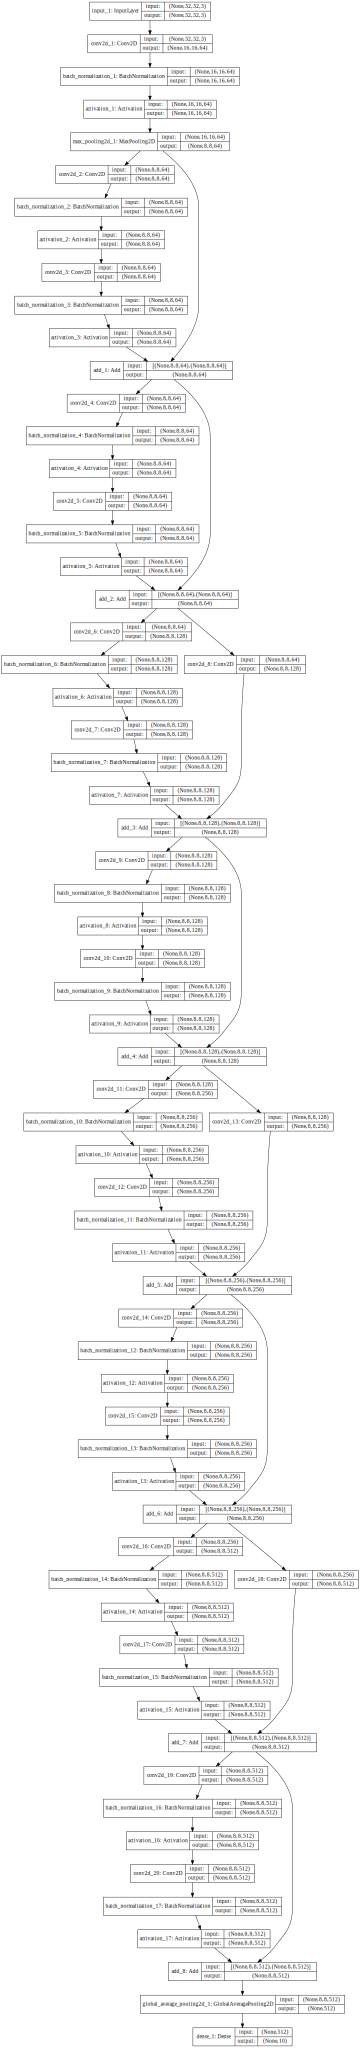

In [0]:
from keras.utils import plot_model
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG

plot_model(model, to_file='Resnet_18_model.png', show_shapes=True)                                   # 保存模型图片
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))                #  显示在jupyter notebook 上

In [0]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        featurewise_center=False,  # 在数据集上将输入平均值设置为0
        samplewise_center=False,  # 将每个样本均值设置为0
        featurewise_std_normalization=False,  # 将输入除以数据集的std
        samplewise_std_normalization=False,  # 将每个输入除以其std
        zca_whitening=False,  # 应用ZCA白化
        rotation_range=20,  # 在一个范围下随机旋转图像(degrees, 0 to 180)
        width_shift_range=0.2,  # 水平随机移位图像（总宽度的分数）
        height_shift_range=0.2,  # 随机地垂直移动图像（总高度的分数）
        horizontal_flip=True,  # 随机翻转图像
        vertical_flip=False)  # 随机翻转图像

    # 计算特征方向归一化所需的数量
    # (std, mean, and principal components if ZCA whitening is applied)
datagen.fit(x_train)

In [0]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.optimizers import Adam, Adadelta, RMSprop, SGD

model_checkpoint = ModelCheckpoint('cifar10_model_12.h5', monitor='val_acc', verbose=1, 
                                   mode='auto', period=1, save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.2, patience=5, verbose=1, min_lr=1e-7)
early_stopping = EarlyStopping(monitor='val_acc', min_delta=0, patience=10, verbose=1, mode='auto')

callbacks = [model_checkpoint, reduce_lr, early_stopping]

# optimizer = Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=1e-6)
# optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=1e-5, amsgrad=False)
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

model.fit_generator(datagen.flow(x_train, y_train,
                        batch_size=128),
                        samples_per_epoch=x_train.shape[0],
                        nb_epoch=100,
                        validation_data=(x_test, y_test),
                   callbacks=callbacks)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., steps_per_epoch=390, epochs=100)`


Epoch 1/100
390/390 [==============================] - 46s 117ms/step - loss: 2.1594 - acc: 0.4026 - val_loss: 1.9702 - val_acc: 0.4529

Epoch 00001: val_acc improved from -inf to 0.45290, saving model to cifar10_model_12.h5
Epoch 2/100
390/390 [==============================] - 39s 99ms/step - loss: 1.6121 - acc: 0.5200 - val_loss: 2.5118 - val_acc: 0.3477

Epoch 00002: val_acc did not improve from 0.45290
Epoch 3/100
390/390 [==============================] - 38s 98ms/step - loss: 1.4047 - acc: 0.5748 - val_loss: 1.4246 - val_acc: 0.5698

Epoch 00003: val_acc improved from 0.45290 to 0.56980, saving model to cifar10_model_12.h5
Epoch 4/100
390/390 [==============================] - 38s 98ms/step - loss: 1.2652 - acc: 0.6183 - val_loss: 1.2798 - val_acc: 0.6241

Epoch 00004: val_acc improved from 0.56980 to 0.62410, saving model to cifar10_model_12.h5
Epoch 5/100
390/390 [==============================] - 38s 98ms/step - loss: 1.1672 - acc: 0.6563 - val_loss: 2.7716 - val_acc: 0.4014


In [0]:
from keras.models import load_model

model = load_model('cifar10_model_12.h5')
model.evaluate(x_test, y_test, batch_size=128)

10000/10000 [==============================] - 3s 326us/step


[0.611445458316803, 0.8502]

参考这里

[Pytorch实战2：ResNet-18实现Cifar-10图像分类（测试集分类准确率95.170%）](https://blog.csdn.net/sunqiande88/article/details/80100891)

## 超越90%

In [0]:
from keras.models import Model
from keras.layers import Input, add, Conv2D, SeparableConv2D, MaxPool2D, Dropout, Dense, GlobalAveragePooling2D, BatchNormalization, concatenate
from keras import layers, models
from keras.layers import LeakyReLU, ThresholdedReLU, Softmax, ReLU, Activation, Reshape, Lambda, ActivityRegularization

inputs = Input(shape=(32, 32, 3))
temp = inputs
x = Conv2D(16, (3, 3), padding='same')(inputs)
x = LeakyReLU(0.1)(x)
x = Conv2D(16, (3, 3), padding='same')(x)
x = LeakyReLU(0.1)(x)
x = Conv2D(32, (3, 3), padding='same')(x)
x = LeakyReLU(0.1)(x)
x = concatenate([x, temp])
x = BatchNormalization()(x)
x = layers.MaxPooling2D((2, 2))(x)

temp = x
x = Conv2D(32, (3, 3), padding='same')(x)
x = LeakyReLU(0.1)(x)
x = Conv2D(32, (3, 3), padding='same')(x)
x = LeakyReLU(0.1)(x)
x = concatenate([x, temp])
x = Conv2D(32, (3, 3), padding='same')(x)
x = LeakyReLU(0.1)(x)
x = Conv2D(64, (3, 3), padding='same')(x)
x = LeakyReLU(0.1)(x)
x = concatenate([x, temp])
x = BatchNormalization()(x)
x = layers.MaxPooling2D((2, 2))(x)

temp = x
x = Conv2D(64, (3, 3), padding='same')(x)
x = LeakyReLU(0.1)(x)
x = Conv2D(64, (3, 3), padding='same')(x)
x = LeakyReLU(0.1)(x)
x = concatenate([x, temp])
x = Conv2D(64, (3, 3), padding='same')(x)
x = LeakyReLU(0.1)(x)
x = Conv2D(128, (3, 3), padding='same')(x)
x = LeakyReLU(0.1)(x)
x = concatenate([x, temp])
x = BatchNormalization()(x)
x = layers.MaxPooling2D((2, 2))(x)

temp = x
x = Conv2D(128, (3, 3), padding='same')(x)
x = LeakyReLU(0.1)(x)
x = Conv2D(128, (3, 3), padding='same')(x)
x = LeakyReLU(0.1)(x)
x = concatenate([x, temp])
x = Conv2D(128, (3, 3), padding='same')(x)
x = LeakyReLU(0.1)(x)
x = Conv2D(256, (3, 3), padding='same')(x)
x = LeakyReLU(0.1)(x)
x = concatenate([x, temp])
x = BatchNormalization()(x)
x = layers.MaxPooling2D((2, 2))(x)

x = Conv2D(128, (1, 1), padding='same')(x)
x = LeakyReLU(0.1)(x)
x = BatchNormalization()(x)
x = GlobalAveragePooling2D()(x)

x = layers.Dense(10, activation='softmax')(x)

model = Model(inputs=inputs, outputs=x)

model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_17 (Conv2D)              (None, 32, 32, 16)   448         input_2[0][0]                    
__________________________________________________________________________________________________
leaky_re_lu_17 (LeakyReLU)      (None, 32, 32, 16)   0           conv2d_17[0][0]                  
__________________________________________________________________________________________________
conv2d_18 (Conv2D)              (None, 32, 32, 16)   2320        leaky_re_lu_17[0][0]             
__________________________________________________________________________________________________
leaky_re_l

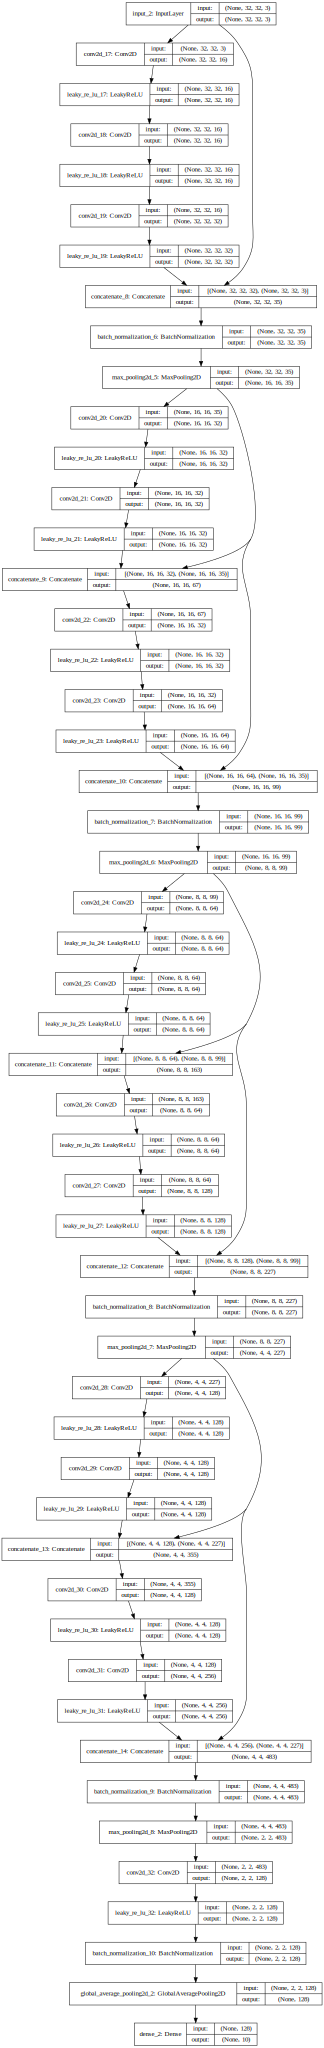

In [0]:
from keras.utils import plot_model
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG

plot_model(model, to_file='cifar10_model.png', show_shapes=True)                                   # 保存模型图片
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))                #  显示在jupyter notebook 上

In [0]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        shear_range=0.1,
        zoom_range=0.1,
        zca_whitening=False,  # 应用ZCA白化
        rotation_range=10,  # 在一个范围下随机旋转图像(degrees, 0 to 180)
        width_shift_range=0.1,  # 水平随机移位图像（总宽度的分数）
        height_shift_range=0.1,  # 随机地垂直移动图像（总高度的分数）
        horizontal_flip=True,  # 随机翻转图像
        vertical_flip=False)  # 随机翻转图像

    # 计算特征方向归一化所需的数量
    # (std, mean, and principal components if ZCA whitening is applied)
datagen.fit(x_train)

In [0]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.optimizers import Adam, Adadelta, RMSprop, SGD, Nadam

model_checkpoint = ModelCheckpoint('cifar10_model_13.h5', monitor='val_acc', verbose=1, 
                                   mode='auto', period=1, save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.2, patience=7, verbose=1, min_lr=1e-7)
early_stopping = EarlyStopping(monitor='val_acc', min_delta=0, patience=10, verbose=1, mode='auto')

callbacks = [model_checkpoint, reduce_lr, early_stopping]

# optimizer = Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=1e-6)
optimizer = Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

model.fit_generator(datagen.flow(x_train, y_train,
                        batch_size=128),
                        samples_per_epoch=x_train.shape[0],
                        nb_epoch=100,
                        validation_data=(x_test, y_test),
                    callbacks=callbacks)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., steps_per_epoch=390, epochs=100)`


Epoch 1/100
390/390 [==============================] - 28s 73ms/step - loss: 1.2108 - acc: 0.5678 - val_loss: 1.5500 - val_acc: 0.5730

Epoch 00001: val_acc improved from -inf to 0.57300, saving model to cifar10_model_13.h5
Epoch 2/100
390/390 [==============================] - 26s 66ms/step - loss: 0.7965 - acc: 0.7222 - val_loss: 0.9563 - val_acc: 0.6899

Epoch 00002: val_acc improved from 0.57300 to 0.68990, saving model to cifar10_model_13.h5
Epoch 3/100
390/390 [==============================] - 25s 65ms/step - loss: 0.6715 - acc: 0.7663 - val_loss: 0.6955 - val_acc: 0.7654

Epoch 00003: val_acc improved from 0.68990 to 0.76540, saving model to cifar10_model_13.h5
Epoch 4/100
390/390 [==============================] - 25s 65ms/step - loss: 0.6028 - acc: 0.7911 - val_loss: 0.7727 - val_acc: 0.7541

Epoch 00004: val_acc did not improve from 0.76540
Epoch 5/100
390/390 [==============================] - 25s 64ms/step - loss: 0.5515 - acc: 0.8093 - val_loss: 0.8937 - val_acc: 0.7352



In [0]:
from keras.models import load_model

model = load_model('cifar10_model_13.h5')
model.evaluate(x_test, y_test, batch_size=128)

10000/10000 [==============================] - 1s 136us/step


[0.37144944324493406, 0.9013]

In [0]:
from keras.models import Model
from keras.layers import Input, add, Conv2D, SeparableConv2D, MaxPool2D, Dropout, Dense, GlobalAveragePooling2D, BatchNormalization, concatenate
from keras import layers, models
from keras.layers import LeakyReLU, ThresholdedReLU, Softmax, ReLU, Activation, Reshape, Lambda, ActivityRegularization

inputs = Input(shape=(32, 32, 3))
temp = inputs
x = Conv2D(16, (3, 3), padding='same')(inputs)
x = LeakyReLU(0.1)(x)
x = Conv2D(16, (3, 3), padding='same')(x)
x = LeakyReLU(0.1)(x)
x = Conv2D(32, (3, 3), padding='same')(x)
x = LeakyReLU(0.1)(x)
x = concatenate([x, temp])
x = BatchNormalization()(x)
x = layers.MaxPooling2D((2, 2))(x)

temp = x
x = Conv2D(32, (3, 3), padding='same')(x)
x = LeakyReLU(0.1)(x)
x = Conv2D(32, (3, 3), padding='same')(x)
x = LeakyReLU(0.1)(x)
x = concatenate([x, temp])
x = Conv2D(32, (3, 3), padding='same')(x)
x = LeakyReLU(0.1)(x)
x = Conv2D(64, (3, 3), padding='same')(x)
x = LeakyReLU(0.1)(x)

x1 = Conv2D(16, (3, 3), padding='same', strides=2)(inputs)
x1 = LeakyReLU(0.1)(x1)
x = concatenate([x, temp, x1])
x = BatchNormalization()(x)
x = layers.MaxPooling2D((2, 2))(x)

temp = x
x = Conv2D(64, (3, 3), padding='same')(x)
x = LeakyReLU(0.1)(x)
x = Conv2D(64, (3, 3), padding='same')(x)
x = LeakyReLU(0.1)(x)
x = concatenate([x, temp])
x = Conv2D(64, (3, 3), padding='same')(x)
x = LeakyReLU(0.1)(x)
x = Conv2D(128, (3, 3), padding='same')(x)
x = LeakyReLU(0.1)(x)

x2 = Conv2D(16, (5, 5), padding='same', strides=4)(inputs)
x2 = LeakyReLU(0.1)(x2)
x3 = Conv2D(16, (3, 3), padding='same', strides=2)(x1)
x3 = LeakyReLU(0.1)(x3)
x = concatenate([x, x2, x3, temp])
x = BatchNormalization()(x)
x = layers.MaxPooling2D((2, 2))(x)

temp = x
x = Conv2D(256, (3, 3), padding='same')(x)
x = LeakyReLU(0.1)(x)
x = Conv2D(256, (3, 3), padding='same')(x)
x = LeakyReLU(0.1)(x)
x = concatenate([x, temp])
x = Conv2D(512, (3, 3), padding='same')(x)
x = LeakyReLU(0.1)(x)
x = Conv2D(512, (3, 3), padding='same')(x)
x = LeakyReLU(0.1)(x)
x1 = Conv2D(16, (5, 5), padding='same', strides=4)(x1)
x1 = LeakyReLU(0.1)(x1)
x4 = Conv2D(16, (3, 3), padding='same', strides=2)(x2)
x4 = LeakyReLU(0.1)(x4)
x5 = Conv2D(16, (3, 3), padding='same', strides=2)(x3)
x5 = LeakyReLU(0.1)(x5)
x = concatenate([x, x1, x4, x5, temp])
x = BatchNormalization()(x)

x = Conv2D(512, (3, 3))(x)
x = LeakyReLU(0.1)(x)
x = Conv2D(256, (1, 1), padding='same')(x)
x = LeakyReLU(0.1)(x)
x = BatchNormalization()(x)
x = GlobalAveragePooling2D()(x)
x = layers.Dense(10, activation='softmax')(x)

model = Model(inputs=inputs, outputs=x)

model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_12 (InputLayer)           (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_230 (Conv2D)             (None, 32, 32, 16)   448         input_12[0][0]                   
__________________________________________________________________________________________________
leaky_re_lu_207 (LeakyReLU)     (None, 32, 32, 16)   0           conv2d_230[0][0]                 
__________________________________________________________________________________________________
conv2d_231 (Conv2D)             (None, 32, 32, 16)   2320        leaky_re_lu_207[0][0]            
__________________________________________________________________________________________________
leaky_re_l

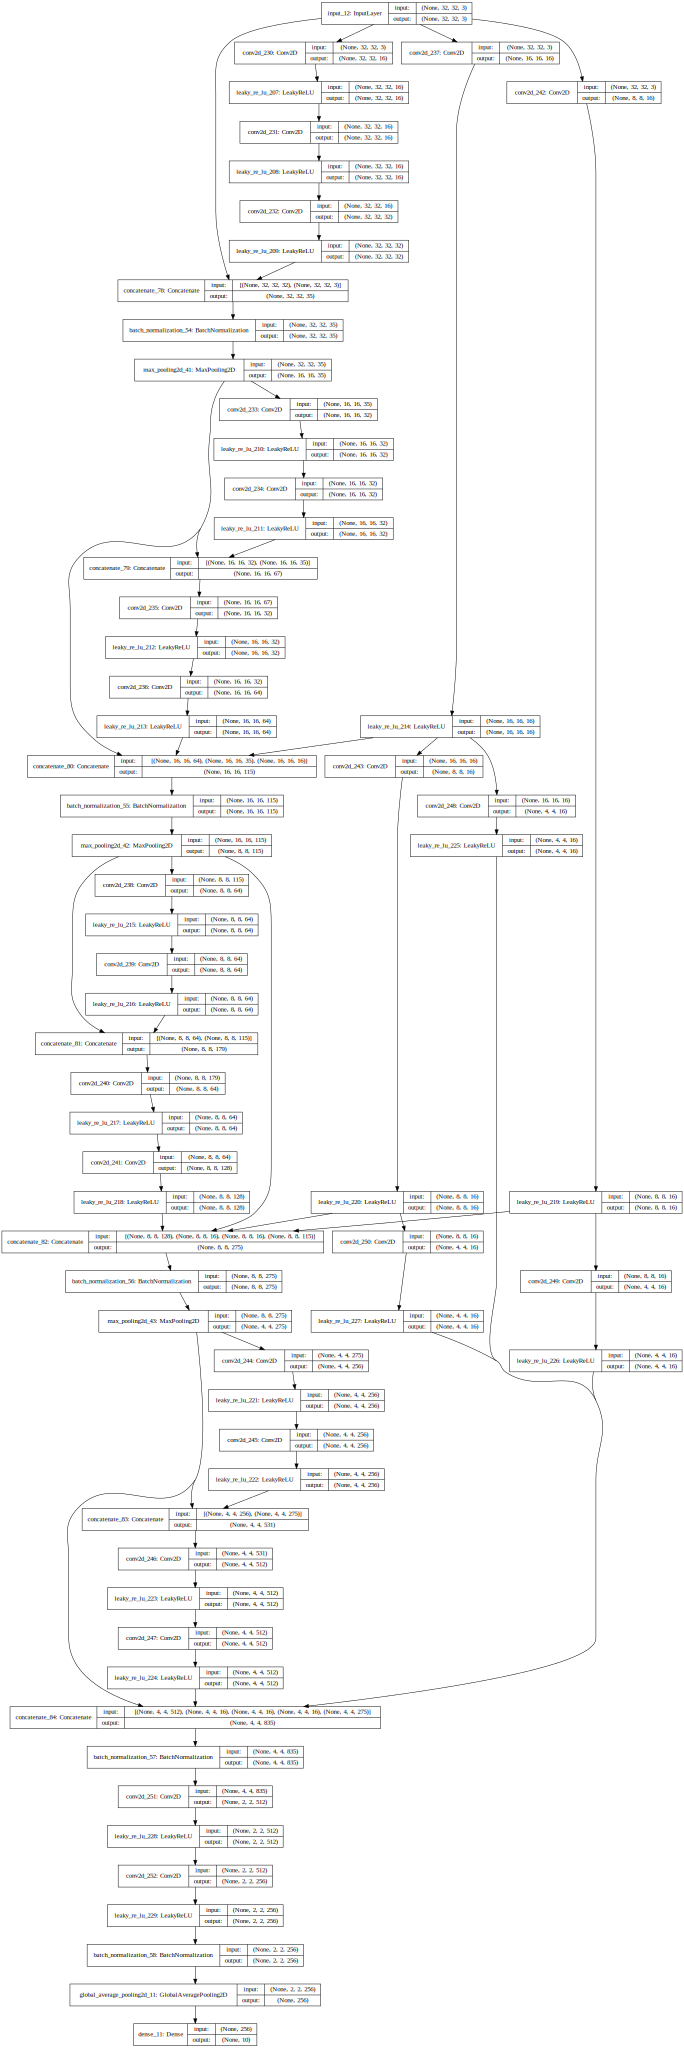

In [0]:
from keras.utils import plot_model
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG

plot_model(model, to_file='cifar10_model_14.png', show_shapes=True)                                   # 保存模型图片
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))                #  显示在jupyter notebook 上

In [0]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.optimizers import Adam, Adadelta, RMSprop, SGD, Adagrad

model_checkpoint = ModelCheckpoint('cifar10_model_14.h5', monitor='val_acc', verbose=1, 
                                   mode='auto', period=1, save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=5, verbose=1, min_lr=1e-4) #<<---------
early_stopping = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')

callbacks = [model_checkpoint, reduce_lr, early_stopping]

# optimizer = Adagrad(lr=0.01, epsilon=None, decay=0.0)
optimizer = Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

model.fit_generator(datagen.flow(x_train, y_train,
                        batch_size=128),
                        samples_per_epoch=x_train.shape[0],
                        nb_epoch=100,
                        validation_data=(x_test, y_test),
                    callbacks=callbacks)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., steps_per_epoch=390, epochs=100)`


Epoch 1/100
390/390 [==============================] - 38s 96ms/step - loss: 1.2125 - acc: 0.5663 - val_loss: 1.0308 - val_acc: 0.6683

Epoch 00001: val_acc improved from -inf to 0.66830, saving model to cifar10_model_14.h5
Epoch 2/100
390/390 [==============================] - 30s 76ms/step - loss: 0.7688 - acc: 0.7317 - val_loss: 1.2345 - val_acc: 0.6587

Epoch 00002: val_acc did not improve from 0.66830
Epoch 3/100
390/390 [==============================] - 29s 74ms/step - loss: 0.6352 - acc: 0.7790 - val_loss: 0.7532 - val_acc: 0.7590

Epoch 00003: val_acc improved from 0.66830 to 0.75900, saving model to cifar10_model_14.h5
Epoch 4/100
390/390 [==============================] - 30s 76ms/step - loss: 0.5651 - acc: 0.8042 - val_loss: 0.7114 - val_acc: 0.7805

Epoch 00004: val_acc improved from 0.75900 to 0.78050, saving model to cifar10_model_14.h5
Epoch 5/100
390/390 [==============================] - 29s 74ms/step - loss: 0.5145 - acc: 0.8193 - val_loss: 0.6199 - val_acc: 0.7968



KeyboardInterrupt: ignored

In [0]:
from keras.models import load_model

model = load_model('cifar10_model_14.h5')  # 加入dropout 也许做的更好
model.evaluate(x_test, y_test, batch_size=128)

10000/10000 [==============================] - 4s 387us/step


[0.465526815700531, 0.9059]

## 深度方向的可分离 2D 卷积 SeparableConv2D

极大的减少参数

In [0]:
from keras.models import Model
from keras.layers import Input, SeparableConv2D, Conv2D, MaxPool2D, Dropout, Dense, GlobalAveragePooling2D, BatchNormalization, concatenate
from keras import layers, models

inputs = Input(shape=(32, 32, 3))
temp = inputs
x = SeparableConv2D(16, (3, 3), padding='same', activation='relu')(inputs)
x = SeparableConv2D(16, (3, 3), padding='same', activation='relu')(x)
x = SeparableConv2D(32, (3, 3), padding='same', activation='relu')(x)
x = concatenate([x, temp])
x = BatchNormalization()(x)
x = layers.MaxPooling2D((2, 2))(x)

temp = x
x = SeparableConv2D(32, (3, 3), padding='same', activation='relu')(x)
x = SeparableConv2D(32, (3, 3), padding='same', activation='relu')(x)
x = SeparableConv2D(64, (3, 3), padding='same', activation='relu')(x)
x = concatenate([x, temp])
x = BatchNormalization()(x)
x = layers.MaxPooling2D((2, 2))(x)
x = Dropout(0.1)(x)

temp = x
x = SeparableConv2D(64, (3, 3), padding='same', activation='relu')(x)
x = SeparableConv2D(64, (3, 3), padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = SeparableConv2D(64, (3, 3), padding='same', activation='relu')(x)
x = SeparableConv2D(128, (3, 3), padding='same', activation='relu')(x)
x = concatenate([x, temp])
x = BatchNormalization()(x)
x = layers.MaxPooling2D((2, 2))(x)
x = Dropout(0.2)(x)

temp = x
x = SeparableConv2D(128, (3, 3), padding='same', activation='relu')(x)
x = SeparableConv2D(128, (3, 3), padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = SeparableConv2D(256, (3, 3), padding='same', activation='relu')(x)
x = SeparableConv2D(256, (3, 3), padding='same', activation='relu')(x)
x = concatenate([x, temp])
x = SeparableConv2D(256, (1, 1), padding='same', activation='relu')(x)
x = BatchNormalization()(x)

x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = layers.Dense(10, activation='softmax')(x)

model = Model(inputs=inputs, outputs=x)

model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_15 (InputLayer)           (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
separable_conv2d_33 (SeparableC (None, 32, 32, 16)   91          input_15[0][0]                   
__________________________________________________________________________________________________
separable_conv2d_34 (SeparableC (None, 32, 32, 16)   416         separable_conv2d_33[0][0]        
__________________________________________________________________________________________________
separable_conv2d_35 (SeparableC (None, 32, 32, 32)   688         separable_conv2d_34[0][0]        
__________________________________________________________________________________________________
concatenat

In [0]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        shear_range=0.1,
        zoom_range=0.1,
        zca_whitening=False,  # 应用ZCA白化
        rotation_range=10,  # 在一个范围下随机旋转图像(degrees, 0 to 180)
        width_shift_range=0.1,  # 水平随机移位图像（总宽度的分数）
        height_shift_range=0.1,  # 随机地垂直移动图像（总高度的分数）
        horizontal_flip=True,  # 随机翻转图像
        vertical_flip=False)  # 随机翻转图像

datagen.fit(x_train)

In [0]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.optimizers import Adam, Adadelta, RMSprop, SGD

model_checkpoint = ModelCheckpoint('cifar10_model_15.h5', monitor='val_acc', verbose=1, 
                                   mode='auto', period=1, save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.2, patience=5, verbose=1, min_lr=1e-4)
early_stopping = EarlyStopping(monitor='val_acc', min_delta=0, patience=10, verbose=1, mode='auto')

callbacks = [model_checkpoint, reduce_lr, early_stopping]

optimizer = Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

model.fit_generator(datagen.flow(x_train, y_train,
                        batch_size=128),
                        samples_per_epoch=x_train.shape[0],
                        nb_epoch=100,
                        validation_data=(x_test, y_test),
                    callbacks=callbacks)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., steps_per_epoch=390, epochs=100)`


Epoch 1/100
390/390 [==============================] - 35s 89ms/step - loss: 1.4865 - acc: 0.4600 - val_loss: 3.9205 - val_acc: 0.2217

Epoch 00001: val_acc improved from -inf to 0.22170, saving model to cifar10_model_15.h5
Epoch 2/100
390/390 [==============================] - 24s 63ms/step - loss: 1.1601 - acc: 0.5857 - val_loss: 3.1333 - val_acc: 0.3617

Epoch 00002: val_acc improved from 0.22170 to 0.36170, saving model to cifar10_model_15.h5
Epoch 3/100
390/390 [==============================] - 25s 63ms/step - loss: 1.0212 - acc: 0.6373 - val_loss: 1.3561 - val_acc: 0.5755

Epoch 00003: val_acc improved from 0.36170 to 0.57550, saving model to cifar10_model_15.h5
Epoch 4/100
390/390 [==============================] - 25s 64ms/step - loss: 0.9266 - acc: 0.6721 - val_loss: 2.7239 - val_acc: 0.3533

Epoch 00004: val_acc did not improve from 0.57550
Epoch 5/100
390/390 [==============================] - 25s 63ms/step - loss: 0.8655 - acc: 0.6964 - val_loss: 0.9270 - val_acc: 0.6867



In [0]:
from keras.models import load_model

model = load_model('cifar10_model_15.h5')
model.evaluate(x_test, y_test, batch_size=128)

10000/10000 [==============================] - 4s 443us/step


[0.44707265548706054, 0.8572]

## ensemble 集成

In [0]:
from keras.models import load_model
import numpy as np

def ensemble_predictions(num_networks):
    pred_labels = []
    test_accuracies = []
    val_accuracies = []

    # For each neural network in the ensemble.
    for i in num_networks:
        try:
            model = load_model('cifar10_model_{}.h5'.format(i))
        except:
            print('cifar10_model_{}.h5'.format(i), '读取失败！')
            continue
        
        result = model.evaluate(x_train, y_train, batch_size=256)
        test_acc = result[-1]         #<<------------- this's train_acc, not test_acc
        test_accuracies.append(test_acc)       
        
        result = model.evaluate(x_test, y_test, batch_size=256)
        val_acc = result[-1]
        val_accuracies.append(val_acc)

        # Print status message.
        print("Network: {0}, Accuracy on Validation-Set: {1:.8f}, Test-Set: {2:.8f}".format(i, val_acc, test_acc))


        
        pred = model.predict(x_test)
        pred_labels.append(pred)
    
    return np.array(pred_labels), np.array(test_accuracies), np.array(val_accuracies)

In [0]:
pred_labels, test_accuracies, val_accuracies = ensemble_predictions(num_networks=[13,14,15])

10000/10000 [==============================] - 1s 83us/step
Network: 13, Accuracy on Validation-Set: 0.90140000, Test-Set: 0.98466000
10000/10000 [==============================] - 1s 122us/step
Network: 14, Accuracy on Validation-Set: 0.90590000, Test-Set: 0.99588000
10000/10000 [==============================] - 1s 63us/step
Network: 15, Accuracy on Validation-Set: 0.85720000, Test-Set: 0.90168000


In [0]:
print("Mean test-set accuracy: {0:.8f}".format(np.mean(test_accuracies)))
print("Min test-set accuracy:  {0:.8f}".format(np.min(test_accuracies)))
print("Max test-set accuracy:  {0:.8f}".format(np.max(test_accuracies)))

print("Mean val-set accuracy: {0:.8f}".format(np.mean(val_accuracies)))
print("Min val-set accuracy:  {0:.8f}".format(np.min(val_accuracies)))
print("Max val-set accuracy:  {0:.8f}".format(np.max(val_accuracies)))

Mean test-set accuracy: 0.96074000
Min test-set accuracy:  0.90168000
Max test-set accuracy:  0.99588000
Mean val-set accuracy: 0.88816667
Min val-set accuracy:  0.85720000
Max val-set accuracy:  0.90590000


In [0]:
ensemble_pred_labels = np.mean(pred_labels, axis=0)

ensemble_cls_pred = np.argmax(ensemble_pred_labels, axis=1)

ensemble_pred_labels.shape, ensemble_cls_pred.shape

((10000, 10), (10000,))

In [0]:
labels_correct = np.argmax(y_test, axis=1)

ensemble_correct = (ensemble_cls_pred == labels_correct)
ensemble_correct

array([ True,  True,  True, ...,  True,  True,  True])

In [0]:
print(np.sum(ensemble_correct))
print('ensemble_model acc=', np.sum(ensemble_correct)/labels_correct.shape[0])

9153
ensemble_model acc= 0.9153


In [0]:
ensemble_incorrect = np.logical_not(ensemble_correct)

print('ensemble_model wrong=', np.sum(ensemble_incorrect)/labels_correct.shape[0])

ensemble_model wrong= 0.0847


In [0]:
best_net = np.argmax(val_accuracies)
print(best_net)
val_accuracies[best_net]

1


0.9059

ensemble_model val_acc= 0.9153

best_net val_acc = 0.9059

你还可以考虑不同的集成方式。

That's all!